In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks");

# Decision Making

So, we learned about credible intervals.
But what if someone asks you to report a single value for $\theta$ in the coin toss example?
What is the correct way of doing this?

You have to make a decision.
If you make any wrong decision, you will incur a cost.
The best decision is the one that minimizes the cost.
Another name for this cost is \emph{loss}.

To formalize this concept, let $\ell(\theta', \theta)$ be the cost we incur when we guess $\theta'$ and the actual value is $\theta$.
This cost is an entirely subjective quantity.
Different people have different costs.
However, here are some ideas:
+ The 0-1 loss:

$$
\ell_{01}(\theta',\theta) = \begin{cases}
1,&\;\text{if}\;\theta'=\theta\\
0,&\;\text{if}\;\theta'\not=\theta.
\end{cases}
= 1_{\{\theta'\}}(\theta).
$$

+ The square loss:

$$
\ell_2(\theta',\theta) = (\theta'-\theta)^2.
$$

+ The absolute loss:

$$
\ell_1(\theta',\theta) = |\theta'-\theta|.
$$

When choosing a value for $\theta$, the rational thing is to minimize our *expected loss*.
We take the expectation over our posterior state of knowledge about $\theta$.
That is, we make our choice by solving this problem:

$$
\theta^* = \min_{\theta'} \mathbb{E}[\ell(\theta',\theta)|x_{1:N}] = \min_{\theta'} \int \ell(\theta',\theta)p(\theta|x_{1:N})d\theta.
$$

For the special loss functions above, the answer is:
+ The choice that minimizes the 0-1 loss is the one maximizing the posterior:

$$
\theta^*_{01} = \arg\max_{\theta} p(\theta|x_{1:N}).
$$

+ The choice that minimizes the square loss is the expectation of the random variable:

$$
\theta^*_2 = \mathbb{E}[\theta|x_{1:N}] = \int \theta p(\theta|x_{1:N})d\theta.
$$

+ The choice that minimizes the absolute loss is the median:

$$
p(\theta \le \theta^*_1 | x_{1:N}) = 0.5.
$$

Let's reintroduce our coin toss example so that we have something to work with:

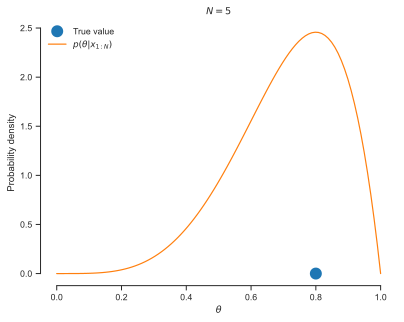

In [4]:
import scipy.stats as st

theta_true = 0.8
X = st.bernoulli(theta_true)

N = 5
data = X.rvs(size=N)

alpha = 1.0 + data.sum()
beta = 1.0 + N - data.sum()
Theta_post = st.beta(alpha, beta)

fig, ax = plt.subplots()
thetas = np.linspace(0, 1, 100)
ax.plot(
    [theta_true],
    [0.0],
    'o',
    markeredgewidth=2,
    markersize=10,
    label='True value')
ax.plot(
    thetas,
    Theta_post.pdf(thetas),
    label=r'$p(\theta|x_{1:N})$'
)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel('Probability density')
ax.set_title(f'$N={N}$')
plt.legend(loc='best', frameon=False)
sns.despine(trim=True);

For the 0-1 loss, we need to find the maximum of the posterior.
This is an optimization problem with an analytical solution, but we will do it differently.
We will solve the problem using a grid search:

In [6]:
idx = np.argmax(Theta_post.pdf(thetas))
theta_star_01 = thetas[idx]
print(f'theta_star_01 = {theta_star_01:.2f}')

theta_star_01 = 0.80


Now, let's the theta $\theta$ that minimizes the square loss.
We have to find the expectation of the posterior $p(\theta|x_{1:N})$ (which is just a Beta).
It is:

$$
\theta^*_N = \mathbb{E}[\theta|x_{1:N}] = \frac{1+\sum_{n=1}^Nx_n}{1+\sum_{n=1}^Nx_n + N + 1 - \sum_{n=1}^Nx_n}
= \frac{1 + \sum_{n=1}^Nx_n}{N+2}.
$$

In [7]:
# In the example we had above:
theta_star_2 = Theta_post.expect()
print(f'theta_star_2 = {theta_star_2:.2f}')

theta_star_2 = 0.71


And finally, here is the median which minimizes the absolute loss:

In [8]:
# In the example we had above:
theta_star_1 = Theta_post.median()
print(f'theta_star_1 = {theta_star_1:.2f}')

theta_star_1 = 0.74


See them all together in the same plot:

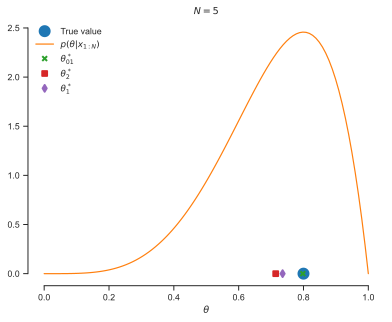

In [9]:
fig, ax = plt.subplots()
ax.plot(
    [theta_true],
    [0.0],
    'o',
    markeredgewidth=2,
    markersize=10,
    label='True value'
)
ax.plot(
    thetas,
    Theta_post.pdf(thetas),
    label=r'$p(\theta|x_{1:N})$'
)
ax.plot(
    theta_star_01,
    0,
    'x',
    markeredgewidth=2,
    label=r'$\theta^*_{01}$'
)
ax.plot(
    theta_star_2,
    0,
    's',
    markeredgewidth=2,
    label=r'$\theta^*_{2}$'
)
ax.plot(
    theta_star_1,
    0,
    'd',
    markeredgewidth=2,
    label=r'$\theta^*_{1}$'
)
ax.set_xlabel(r'$\theta$')
ax.set_title(f'$N={N}$')
plt.legend(loc='best', frameon=False)
sns.despine(trim=True);

## Questions
+ Repeat the analysis for $N=0, 5, 10, 100$. Do these estimates converge to the actual value?